### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('coupons.csv')

In [5]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [7]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [9]:
# Drop car since most of the rows are blank
# Keep other blank columns since only a handful of rows for other columns (Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50) have blank values

df = data.drop('car', axis=1)
print(df['Bar'].value_counts().sort_values())
print(df['CoffeeHouse'].value_counts().sort_values())
print(df['CarryAway'].value_counts().sort_values())
print(df['RestaurantLessThan20'].value_counts().sort_values())
print(df['Restaurant20To50'].value_counts().sort_values())


# Since all the null columns have a value of never, it makes sense to assume that the blank values can be assumed as 'never' and replaced for easier data analysis
df.loc[:, ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']] = df.loc[:, ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']].fillna('never')
df.isnull().sum()   

Bar
gt8       349
4~8      1076
1~3      2473
less1    3482
never    5197
Name: count, dtype: int64
CoffeeHouse
gt8      1111
4~8      1784
never    2962
1~3      3225
less1    3385
Name: count, dtype: int64
CarryAway
never     153
gt8      1594
less1    1856
4~8      4258
1~3      4672
Name: count, dtype: int64
RestaurantLessThan20
never     220
gt8      1285
less1    2093
4~8      3580
1~3      5376
Name: count, dtype: int64
Restaurant20To50
gt8       264
4~8       728
never    2136
1~3      3290
less1    6077
Name: count, dtype: int64


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [11]:
print(df.value_counts('Y'))
proportion_accepted =df['Y'].mean()
proportion_accepted

Y
1    7210
0    5474
Name: count, dtype: int64


0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

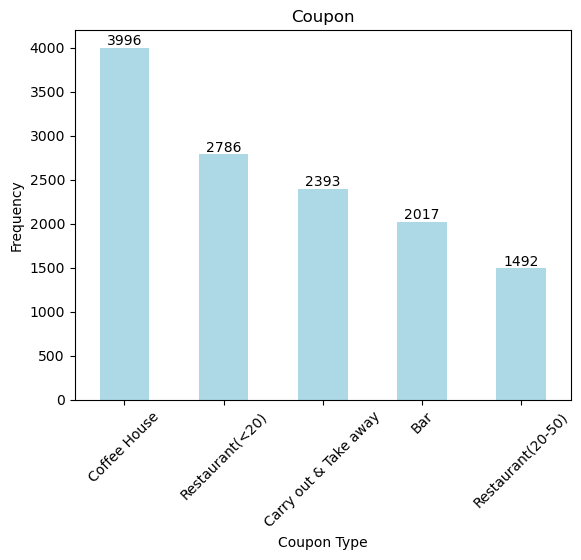

In [13]:
value_counts = df['coupon'].value_counts().sort_values(ascending=False)
ax = value_counts.plot(kind='bar', color='lightblue', title='Coupon')

# Add data labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, str(int(height)), 
            ha='center', va='bottom', fontsize=10)

plt.xlabel('Coupon Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

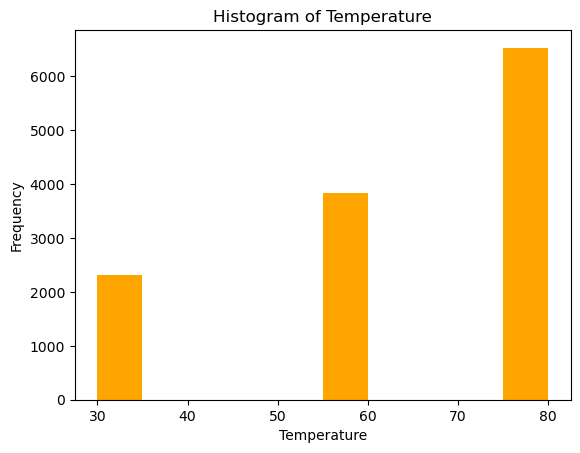

In [15]:
# Create the histogram
plt.hist(df['temperature'],color='orange')

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')

# Show the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [17]:
# Create a new DataFrame that contains just the bar coupons.
df_bar = df[df['coupon']=='Bar']
df_bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [19]:
# 2. What proportion of bar coupons were accepted?
print(df_bar.value_counts('Y'))
bar_accepted =df_bar['Y'].mean()
bar_accepted

# The average bar acceptance rate is 41%. This serves as a grounding base number to compare for the rest of the analysis

Y
0    1190
1     827
Name: count, dtype: int64


0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [21]:
# 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

print(df_bar['Bar'].value_counts())
df_barless3 = df_bar[df_bar['Bar'].isin(['never','less1','1~3'])]
df_barmore3 = df_bar[df_bar['Bar'].isin(['4~8','gt8'])]
df_barmore3

barless3_accepted =df_barless3['Y'].mean()
barmore3_accepted =df_barmore3['Y'].mean()
print(barless3_accepted)
print(barmore3_accepted)

# 37% acceptance rate of bar coupons by those who went to a bar 3 or fewer times a month is almost half of the acceptance rate of 77% for those went more than 3 times

Bar
never    851
less1    570
1~3      397
4~8      150
gt8       49
Name: count, dtype: int64
0.37073707370737075
0.7688442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [23]:
# 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a difference?

df_barmore1andover25 = df_bar[(df_bar['Bar'].isin(['1~3','4~8','gt8'])) & (df_bar['age'].isin(['26','31','36','41','46','50plus']))]

df_barmore1andover25

barmore1andover25 =df_barmore1andover25['Y'].mean()
print(barmore1andover25)
print(bar_accepted)

# The acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 is approx. 70%, significantly higher than average acceptance rate of 41% for all others

0.6952380952380952
0.41001487357461575


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [25]:
df_5 = df_bar[(df_bar['Bar'].isin(['1~3','4~8','gt8'])) & (~df_bar['passanger'].isin(['Kid(s)'])) & (~df_bar['occupation'].isin(['farming','fishing','forestry']))]
#print(df_5)

accepted_5 =df_5['Y'].mean()
print(accepted_5)
print(bar_accepted)

# The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 71%, much higher than the avaerage rate of 41%

0.7132486388384754
0.41001487357461575


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 


In [27]:
df_6a = df_bar[((df_bar['Bar'].isin(['1~3','4~8','gt8'])) & (~df_bar['passanger'].isin(['Kid(s)'])) & (~df_bar['maritalStatus'].isin(['Widowed']))) | 
(df_bar['Bar'].isin(['1~3','4~8','gt8'])) & (df_bar['age'].isin(['21','26','below21'])) | 
(df_bar['RestaurantLessThan20'].isin(['4~8','gt8'])) & 
(df_bar['income'].isin(['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']))]
accepted_6a = df_6a['Y'].mean()
#accepted_6b = df_6b['Y'].mean()
#accepted_6c = df_6c['Y'].mean()


print(accepted_6a)
#print(accepted_6b)
#print(accepted_6c)
print(bar_accepted)

# The acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is 71%, much higher than average rate
# The acceptance rate for drivers who go to bars more than once a month and are under the age of 30 is 72%, much higher than average rate
# The acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K is only 41%, same as average rate

0.5889175257731959
0.41001487357461575


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [30]:
# Exploring Coffee House Coupons

# Create a new DataFrame that contains just the coffee coupons.

df_coffee = df[df['coupon']=='Coffee House']
df_coffee

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [32]:
# 2. What proportion of coffee coupons were accepted?
print(df_coffee.value_counts('Y'))
coffee_accepted = df_coffee['Y'].mean()
coffee_accepted

# The average bar acceptance rate is 50%. This serves as a grounding base number to compare for the rest of the analysis

Y
0    2001
1    1995
Name: count, dtype: int64


0.49924924924924924

In [34]:
# 3. Compare the acceptance rate between those who went to a coffee house 3 or fewer times a month to those who went more.

print(df_coffee['CoffeeHouse'].value_counts())
df_coffeeless3 = df_coffee[df_coffee['Bar'].isin(['never','less1','1~3'])]
df_coffeemore3 = df_coffee[df_coffee['Bar'].isin(['4~8','gt8'])]

coffeeless3_accepted = df_coffeeless3['Y'].mean()
coffeemore3_accepted = df_coffeemore3['Y'].mean()
print(coffeeless3_accepted)
print(coffeemore3_accepted)

# 50% acceptance rate of bar coupons by those who went to a bar 3 or fewer times a month is almost same as the acceptance rate of 51% for those went more than 3 times

CoffeeHouse
less1    1075
1~3      1042
never     999
4~8       538
gt8       342
Name: count, dtype: int64
0.49814972957586107
0.5072463768115942


In [36]:
# 4A. Compare the acceptance rate between drivers based on destination

df_destin = df_coffee[(df_coffee['destination'].isin(['No Urgent Place']))]

coffee_destin = df_destin['Y'].mean()
print(coffee_destin)

# The acceptance rate for drivers driving home is 36%, significantly lower than overall average --> Destination is a good predictor
# The acceptance rate for drivers driving to no urgent place is 58%, higher than overall average --> Destination is a good predictor

# 4B. Compare the acceptance rate between drivers based on passanger

df_pass = df_coffee[(df_coffee['passanger'].isin(['Partner']))]

coffee_pass = df_pass['Y'].mean()
print(coffee_pass)

# The acceptance rate for drivers driving with friend(s) is 60%, significantly higher than overall average --> Passanger is a good predictor
# The acceptance rate for drivers driving with partner is 57%, significantly higher than overall average --> Passanger is a good predictor

# 4C. Compare the acceptance rate based on weather

df_weather = df_coffee[(df_coffee['weather'].isin(['Snowy']))]

coffee_weather = df_weather['Y'].mean()
print(coffee_weather)

# The acceptance rate for drivers during rainy weather is 52% and Snowy weather is 43%, relatively similar to overall average --> Weather is not a great predictor

# 4D. Compare the acceptance rate between drivers based on temperature

df_temp = df_coffee[(df_coffee['temperature'].isin([55]))]

coffee_temp = df_temp['Y'].mean()
print(coffee_temp)

# The acceptance rate for drivers during cold temperature is 44%, relatively similar to overall average --> Temperature is not a good predictor

# 4E. Compare the acceptance rate between drivers based on time

df_time = df_coffee[(df_coffee['time'].isin(['2PM']))]

coffee_time = df_time['Y'].mean()
print(coffee_time)

# The acceptance rate for drivers driving driving at 10AM is 64% and 2PM is 55%, significantly higher than overall average --> Time is a great predictor

# 4F. Compare the acceptance rate between drivers based on expiration

df_exp = df_coffee[(df_coffee['expiration'].isin(['1d']))]

exp = df_exp['Y'].mean()
print(exp)

# The acceptance rate for coupons expiring in 1 day is 58%, significantly higher than overall average --> Expiration is a great predictor

# 4G. Compare the acceptance rate between drivers based on gender

df_gender = df_coffee[(df_coffee['gender'].isin(['Female']))]

gender = df_gender['Y'].mean()
print(gender)

# The acceptance rate for male and female is very similar, relatively similar to overall average --> Gender is not a great predictor

0.5809744779582366
0.5704918032786885
0.43234323432343236
0.4557556773688332
0.5478589420654912
0.5839457320520068
0.492442710872745
